## **Objective **
### Social Media Tweet Analysis on Twitter Dataset
*   Topic Modeling on Twitter Dataset


*   Reference for [Topic modeling ](https://https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.
 It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.
 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




In [34]:
from extract_dataframe import read_json,TweetDfExtractor
from clean_tweets_dataframe import Clean_Tweets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn. metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

def text_catagory(p):
    if p > 0:
        return 'positive'
    elif p < 0:
        return 'negative'
    else:
        return 'neutral'
    
file_name = 'processed_tweet_data.csv'
df = pd.read_csv(file_name)

# see polarity
df['polarity']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
24620    0.0
24621    0.0
24622    0.0
24623    0.0
24624    0.0
Name: polarity, Length: 24625, dtype: float64

In [35]:
_, tweet_list = read_json("data/Economic_Twitter_Data.json")
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df() 

File Successfully Saved.!!!


In [36]:
cleaner=Clean_Tweets()
cleaned_dataframe= cleaner.drop_duplicate(df)

Cleaned Tweets Data


In [37]:
cleaned_dataframe.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,2356,355.0,McMc74078966,3,12,NaN,NaN,NaN,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,1985,505.0,McMc74078966,3,12,NaN,NaN,NaN,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,16,4.0,McMc74078966,3,12,NaN,NaN,NaN,NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,1242,332.0,McMc74078966,3,12,NaN,"['Deutschen', 'Spritpreisen', 'inflation', 'Ab...",NaN,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,1329,386.0,McMc74078966,3,12,NaN,NaN,NaN,NaN


In [38]:
cleaned_dataframe=cleaner.convert_to_numbers(cleaned_dataframe)

In [39]:
cleaned_dataframe=cleaner.remove_non_english_tweets(cleaned_dataframe)

In [40]:

cleaned_dataframe = df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleaned_dataframe.head()

,clean_text,polarity
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0


In [41]:
# Apply text_category on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet, form a new column called  𝐬𝐜𝐨𝐫𝐞
cleaned_dataframe['score'] = cleaned_dataframe["polarity"].map(text_catagory)

In [42]:
cleaned_dataframe.head()

,clean_text,polarity,score
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral


<AxesSubplot:xlabel='score'>

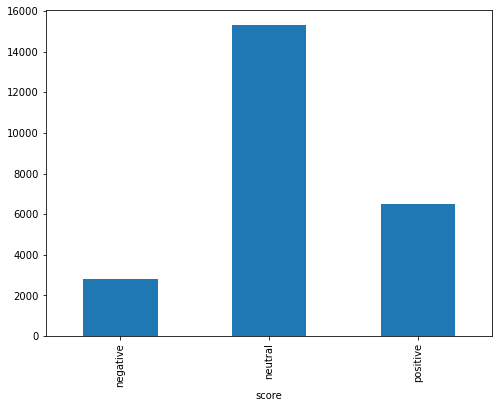

In [43]:
# visualize using BarChart
fig,axis=plt.subplots(figsize=(8,6))
cleaned_dataframe.groupby('score')['clean_text'].count().plot.bar(ax=axis)

<AxesSubplot:ylabel='clean_text'>

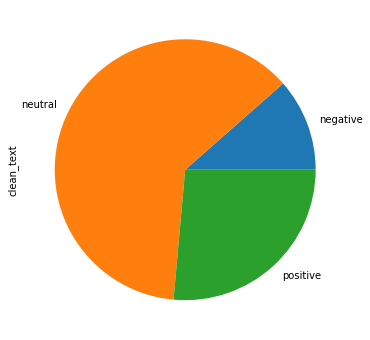

In [54]:
# visualize using PieChart
fig,axis=plt.subplots(figsize=(8,6))
cleaned_dataframe.groupby('score')['clean_text'].count().plot.pie(ax=axis)

In [45]:
# Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral)
cleanTweet = cleaned_dataframe[cleaned_dataframe['polarity'] != 0]

# reset the frame index.
cleaned_dataframe.reset_index(drop=True, inplace=True)
cleaned_dataframe.head()

,clean_text,polarity,score
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral


In [46]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    return 1 if (value == 'positive') else 0

cleaned_dataframe['scoremap'] = cleaned_dataframe['score'].map(get_score)
cleaned_dataframe.head()

,clean_text,polarity,score,scoremap
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral,0
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral,0
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral,0
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral,0
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral,0


In [47]:
# Create feature and target variables (X,y) from  𝐜𝐥𝐞𝐚𝐧-𝐭𝐞𝐱𝐭  and  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  columns respectively.
X = cleaned_dataframe['clean_text']
y = cleaned_dataframe['scoremap']

In [48]:
# Use train_test_split function to construct (X_train, y_train) and (X_test, y_test) from (X,y)
# i dont' know what it is actually doing
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [49]:
# Build an SGDClassifier model from the vectorize train text data. Use CountVectorizer() with a  trigram  parameter.
# pipeline = Pipeline([
#     ('vector',  CountVectorizer(analyzer='word', ngram_range=(3,3))),
#     ('tfitf', TfidfTransformer()),
#     ('clf', SGDClassifier(max_iter=1000))
# ])
# X_train_count = pipeline.fit(x_train, y_train)
# can't run this for y_train
# y_predection = X_train_count.predict(x_test)
cv = CountVectorizer(ngram_range=(3, 3))
X_train_cv = cv.fit_transform(x_train)
X_test_cv = cv.transform(x_test)
X_train_cv

<18468x206383 sparse matrix of type '<class 'numpy.int64'>'
	with 255754 stored elements in Compressed Sparse Row format>

In [50]:
# Evaluate your model on the test data.
clf = SGDClassifier()
clf.fit(X_train_cv, y_train)
predictions = clf.predict(X_test_cv)

In [51]:
results = confusion_matrix(y_test, predictions) 
results

array([[4513,   15],
       [1232,  397]], dtype=int64)

In [52]:
# accuracy
accuracy_score(y_test, predictions)

0.7974662985220075

In [53]:
# Classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4528
           1       0.96      0.24      0.39      1629

    accuracy                           0.80      6157
   macro avg       0.87      0.62      0.63      6157
weighted avg       0.83      0.80      0.75      6157



**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

## Data Understanding
### Loading necessary packages

In [56]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [57]:
#tweets_df=pd.read_csv('cleaned_fintech_data.csv')
cleaned_dataframe.dropna()


,clean_text,polarity,score,scoremap
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral,0
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral,0
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral,0
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral,0
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral,0
...,...,...,...,...
24620,RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...,0.0,neutral,0
24621,"RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...",0.0,neutral,0
24622,RT @Parthtiwari25: Gujarat Congress MLA arrest...,0.0,neutral,0
24623,RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,neutral,0


In [58]:
len(cleaned_dataframe)

24625

In [60]:
cleaned_dataframe = df[['original_text', 'polarity']].rename({'original_text': 'clean_text'}, axis=1)
cleaned_dataframe.head()

,clean_text,polarity
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0


In [61]:
# Apply text_category on the  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲  column of cleanTweet, form a new column called  𝐬𝐜𝐨𝐫𝐞
cleaned_dataframe['score'] = cleaned_dataframe["polarity"].map(text_catagory)

In [62]:
# Remove rows from cleanTweet where  𝐩𝐨𝐥𝐚𝐫𝐢𝐭𝐲   =0  (i.e where  𝐬𝐜𝐨𝐫𝐞  = Neutral)
cleaned_dataframe = cleaned_dataframe[cleaned_dataframe['polarity'] != 0]

# reset the frame index.
cleanTweet.reset_index(drop=True, inplace=True)
cleanTweet.head()

,clean_text,polarity,score
0,"RT @Safka111: Sorry als Mutter von 3 Kindern, ...",-0.50,negative
1,RT @NorthstarCharts: The 10-year yield is tell...,0.16,positive
2,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,positive
3,RT @biancoresearch: Rates rise until something...,-0.40,negative
4,RT @LanceRoberts: Buying opportunities like th...,-0.10,negative


In [63]:
# Construct a column  𝐬𝐜𝐨𝐫𝐞𝐦𝐚𝐩  Use the mapping {'positive':1, 'negative':0} on the  𝐬𝐜𝐨𝐫𝐞  column
def get_score(value):
    return 1 if (value == 'positive') else 0

cleaned_dataframe['scoremap'] = cleaned_dataframe['score'].map(get_score)
cleaned_dataframe.head()

,clean_text,polarity,score,scoremap
10,"RT @Safka111: Sorry als Mutter von 3 Kindern, ...",-0.50,negative,0
38,RT @NorthstarCharts: The 10-year yield is tell...,0.16,positive,1
39,RT @MichaelAArouet: German 10y mortgage rate w...,0.15,positive,1
43,RT @biancoresearch: Rates rise until something...,-0.40,negative,0
44,RT @LanceRoberts: Buying opportunities like th...,-0.10,negative,0


In [64]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    #cleanTweet = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    cleaned_dataframe['clean_text']=cleaned_dataframe['clean_text'].astype(str)
    cleaned_dataframe['clean_text'] = cleaned_dataframe['clean_text'].apply(lambda x: x.lower())
    cleaned_dataframe['clean_text']= cleaned_dataframe['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in cleaned_dataframe['clean_text']]
    word_list = [sent.split() for sent in sentence_list]

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list)
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]



    
    return word_list, word_to_id, corpus_1


In [65]:
PrepareData_obj=PrepareData(cleaned_dataframe)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet



In [66]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [67]:


pprint(lda_model.show_topics(formatted=False))

[(0,
  [('amp', 0.02563563),
   ('her', 0.014379377),
   ('go', 0.012811935),
   ('when', 0.01020683),
   ('down', 0.0101953875),
   ('aitcofficial', 0.010168042),
   ('tomorrow', 0.0069517787),
   ('sri', 0.0062129335),
   ('very', 0.0059756753),
   ('minister', 0.005385915)]),
 (1,
  [('the', 0.047047418),
   ('rt', 0.039100487),
   ('to', 0.03416059),
   ('of', 0.024893278),
   ('in', 0.02334265),
   ('a', 0.021714842),
   ('is', 0.018764243),
   ('and', 0.01840655),
   ('for', 0.017001826),
   ('on', 0.011824759)]),
 (2,
  [('follow', 0.039738808),
   ('100', 0.021618586),
   ('know', 0.015253496),
   ('last', 0.0105579635),
   ('may', 0.00950971),
   ('thanks', 0.008246726),
   ('week', 0.0073623233),
   ('covid19', 0.007110613),
   ('1', 0.007044353),
   ('cases', 0.0065873526)]),
 (3,
  [('about', 0.019880366),
   ('really', 0.010335476),
   ('news', 0.00921919),
   ('media', 0.008091885),
   ('fuel', 0.00733606),
   ('the…', 0.007185671),
   ('crisis', 0.0070009087),
   ('perso

Each line is a topic with individual topic terms and weights. Topic0  can be termed as climate change, and Topic4 can be termed as government and carbon emission.

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [68]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -9.129661678230043

 Ldamodel Coherence Score/Accuracy on Tweets:  0.5076556491405557


Basic Ldamodel Coherence Score 0.58 This means that the model has performed reasonably well in topic modeling.

In [69]:
!pip install pyLDAvis 

**Anlayizing results**
Exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics

In [70]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.360274  0.003218       1        1  74.257809
0      0.096328  0.191884       2        1  10.855160
4      0.088644 -0.065715       3        1   5.594897
2      0.091672 -0.084344       4        1   5.042694
3      0.083631 -0.045044       5        1   4.249441, topic_info=           Term         Freq        Total Category  logprob  loglift
40          the  6003.000000  6003.000000  Default  30.0000  30.0000
14           rt  4989.000000  4989.000000  Default  29.0000  29.0000
61           to  4359.000000  4359.000000  Default  28.0000  28.0000
839         amp   478.000000   478.000000  Default  27.0000  27.0000
199      follow   345.000000   345.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
148        mind    14.459796    15.116406   Topic5  -6.2245   3.1140
1645      event    14.139097    14.792857   Topic5  -6.2470   3.1132
12690     drugs    14.896629    15.592958   Topic5  -6.1948   3.1127
21744     singh    20.976656    22.347961   Topic5  -5.8525   3.0951
1789   analysis    14.667964    15.564061   Topic5  -6.2102   3.0991

[188 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
770       4  0.988662        1
1133      4  0.994230      100
4361      4  0.967061     1000
818       5  0.968000       12
0         3  0.995018        2
...     ...       ...      ...
490       1  0.999376     with
1217      4  0.976310  working
1820      4  0.979789    worth
1304      2  0.988130     year
63        1  0.999480      you

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])